## EDA on Gemstone Data Set 

<h3>Import the dependancies</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3>Loading the dataset</h3>

In [2]:
gemstone_data = pd.read_csv('cubic_zirconia.csv')

In [3]:
gemstone_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


<h3>Dropping the Unnamed column</h3>

In [6]:
gemstone_data.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
gemstone_data.shape

(26967, 10)

In [7]:
gemstone_data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [22]:
gemstone_data.nunique()

carat       256
cut           5
color         7
clarity       8
depth       169
table       112
x           530
y           525
z           354
price      8629
dtype: int64

## EDA and Data Preprocessing

<h3>Checking for null values</h3>

In [8]:
gemstone_data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

<h3>Dropping the rows that contains null values</h3>

In [15]:
gemstone_data.dropna(axis=0,inplace=True)

<h3>Cross validating for null values</h3>

In [16]:
gemstone_data.isnull().values.any()

False

In [24]:
gemstone_data.shape

(26270, 10)

<h3>Dropping the duplicate values</h3>

In [25]:
gemstone_data = gemstone_data.drop_duplicates()

In [26]:
gemstone_data.shape

(26236, 10)

<h3>Descriptive Statistics</h3>

In [27]:
gemstone_data.describe()

,carat,depth,table,x,y,z,price
count,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000,26236.000000
mean,0.797620,61.745285,57.455877,5.728646,5.732487,3.536339,3935.926818
std,0.476691,1.412243,2.230866,1.126332,1.165283,0.698608,4019.809223
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2374.000000
75%,1.050000,62.500000,59.000000,6.540000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,8.060000,18818.000000


In [28]:
gemstone_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26236 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26236 non-null  float64
 1   cut      26236 non-null  object 
 2   color    26236 non-null  object 
 3   clarity  26236 non-null  object 
 4   depth    26236 non-null  float64
 5   table    26236 non-null  float64
 6   x        26236 non-null  float64
 7   y        26236 non-null  float64
 8   z        26236 non-null  float64
 9   price    26236 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.2+ MB


## Correlation HeatMap

<AxesSubplot:>

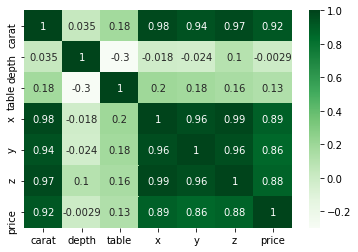

In [29]:
sns.heatmap(gemstone_data.corr(),cmap='Greens',annot=True)

## Univariate Analysis

### For Categorial Features

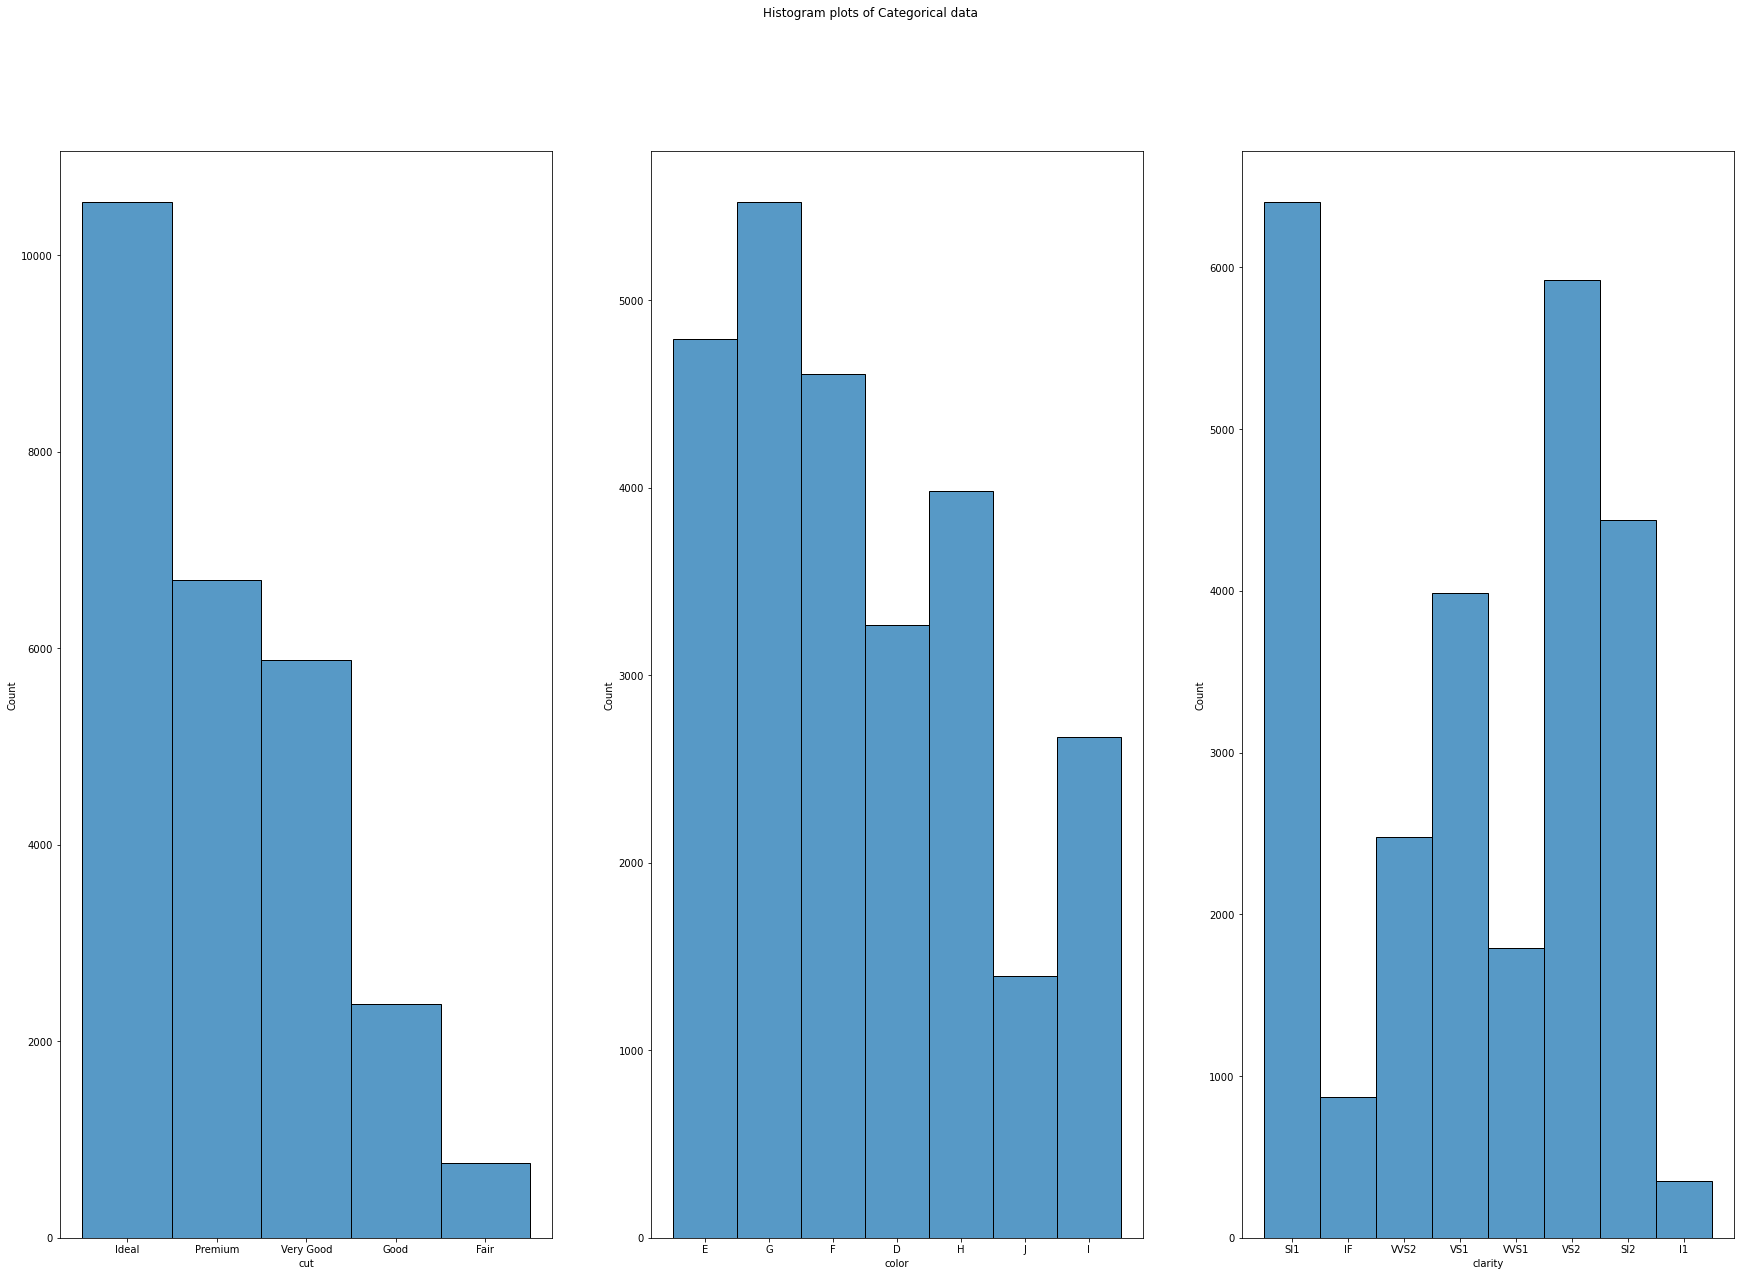

In [30]:
plt.figure(figsize = (30,20))
plt.subplot(131)
sns.histplot(data = gemstone_data, x = 'cut')

plt.subplot(132)
sns.histplot(data = gemstone_data, x = 'color')

plt.subplot(133)
sns.histplot(data = gemstone_data, x = 'clarity')

plt.suptitle('Histogram plots of Categorical data')
plt.show()

### For Numerical Features

In [31]:
numerical_features = [feature for feature in gemstone_data.columns if gemstone_data[feature].dtypes != 'O']

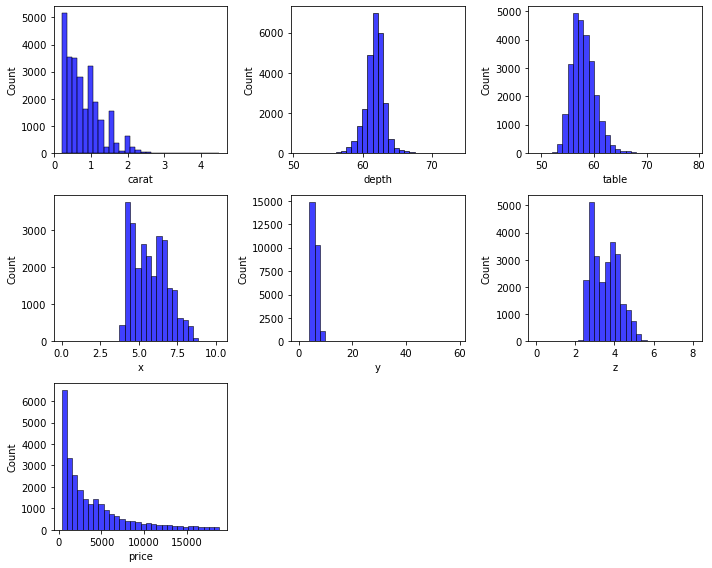

In [33]:
plt.figure(figsize = (10,8))

for i,col in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.histplot( x = col, data = gemstone_data, 
                 bins = 30, color = 'blue')
    plt.tight_layout()

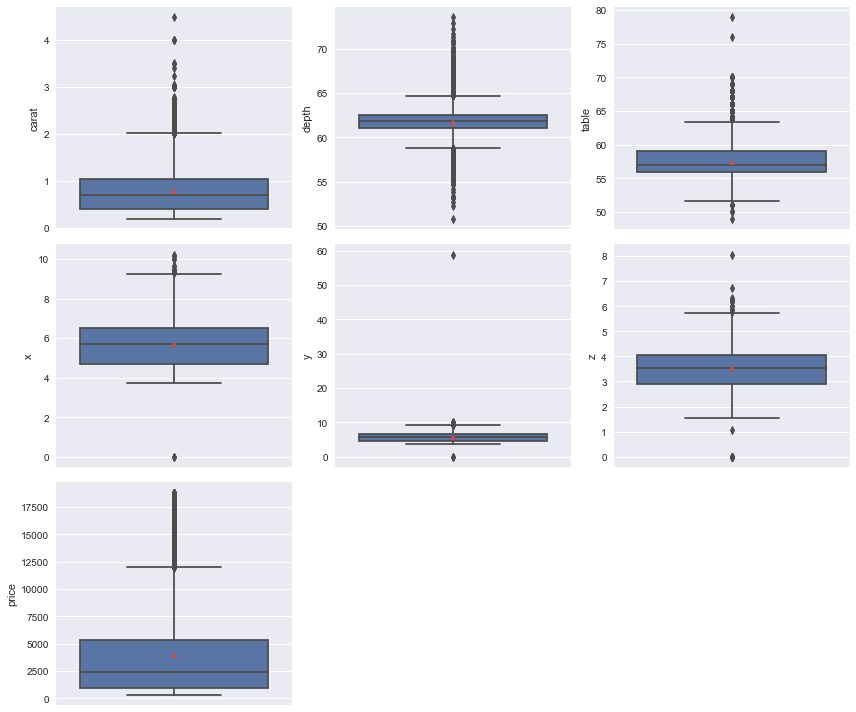

In [34]:
plt.figure(figsize = (12,10))
plt.style.use('seaborn')
for i,col in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.boxplot( y = col, data = gemstone_data, 
                showmeans = True)
    plt.tight_layout()

## Bivariate Analysis

### Removing Outliers

In [37]:
from scipy.stats import zscore
gemstone_data_1 = gemstone_data.copy(deep = True)
def drop_numerical_outliers(gemstone_data, z_thresh=3):
    outliers = gemstone_data.select_dtypes(include=[np.number]).apply(lambda x: np.abs(zscore(x)) < z_thresh).all(axis=1)
    gemstone_data.drop(gemstone_data.index[~outliers], inplace=True)
    return gemstone_data

gemstone_data_1 = drop_numerical_outliers(gemstone_data_1)
gemstone_data_1.shape

(25081, 10)

### Scatter plots of x, y, z and carat against price

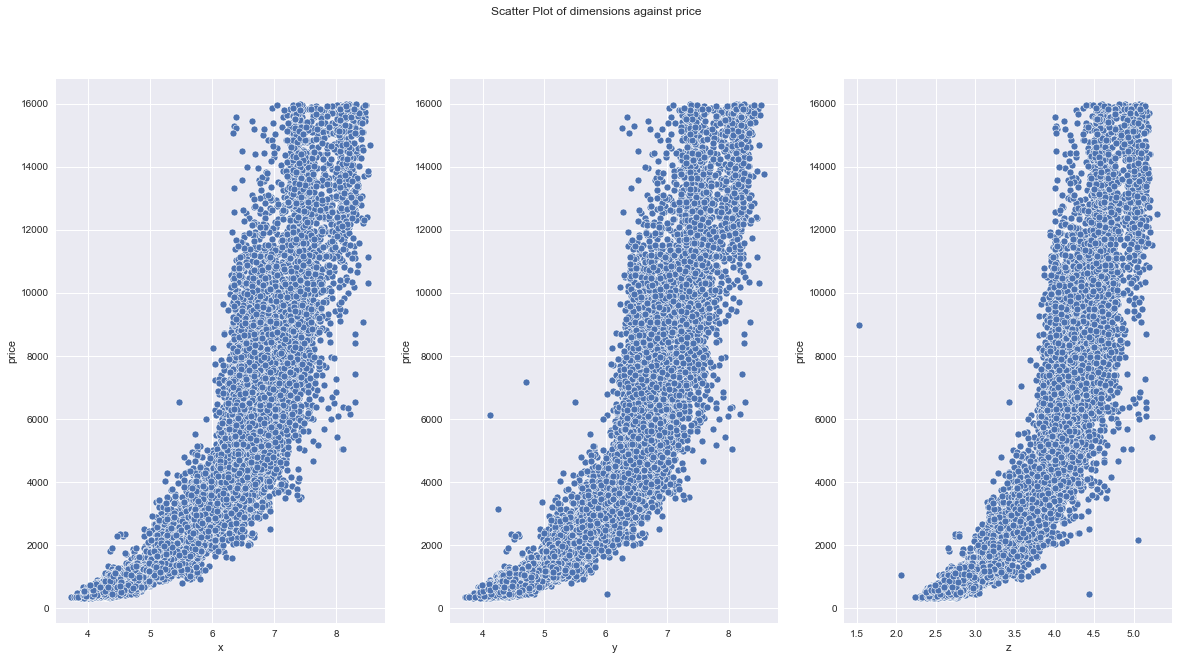

In [39]:

plt.figure(figsize = (20,10))
plt.subplot(131)
sns.scatterplot(data = gemstone_data_1, x = 'x', y= 'price')

plt.subplot(132)
sns.scatterplot(data = gemstone_data_1, x = 'y', y= 'price')

plt.subplot(133)
sns.scatterplot(data = gemstone_data_1, x = 'z', y= 'price')



plt.suptitle('Scatter Plot of dimensions against price')
plt.show()

## Multivariate Analysis

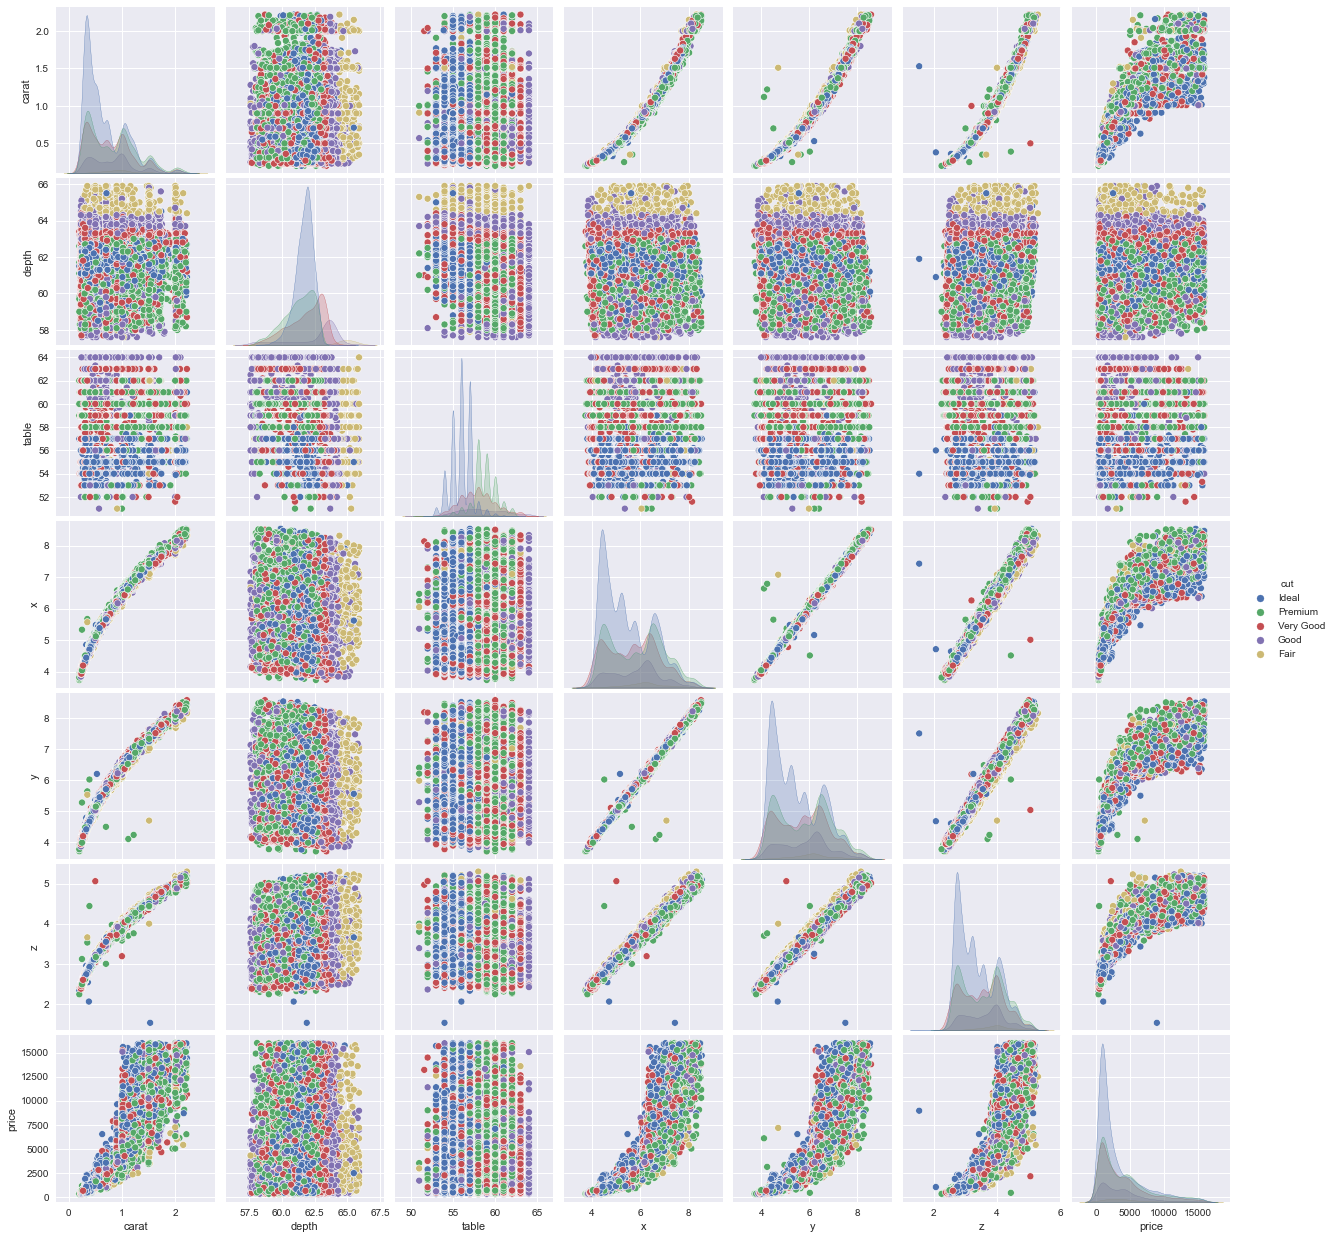

In [40]:
sns.pairplot(gemstone_data_1, hue = 'cut')
plt.show()

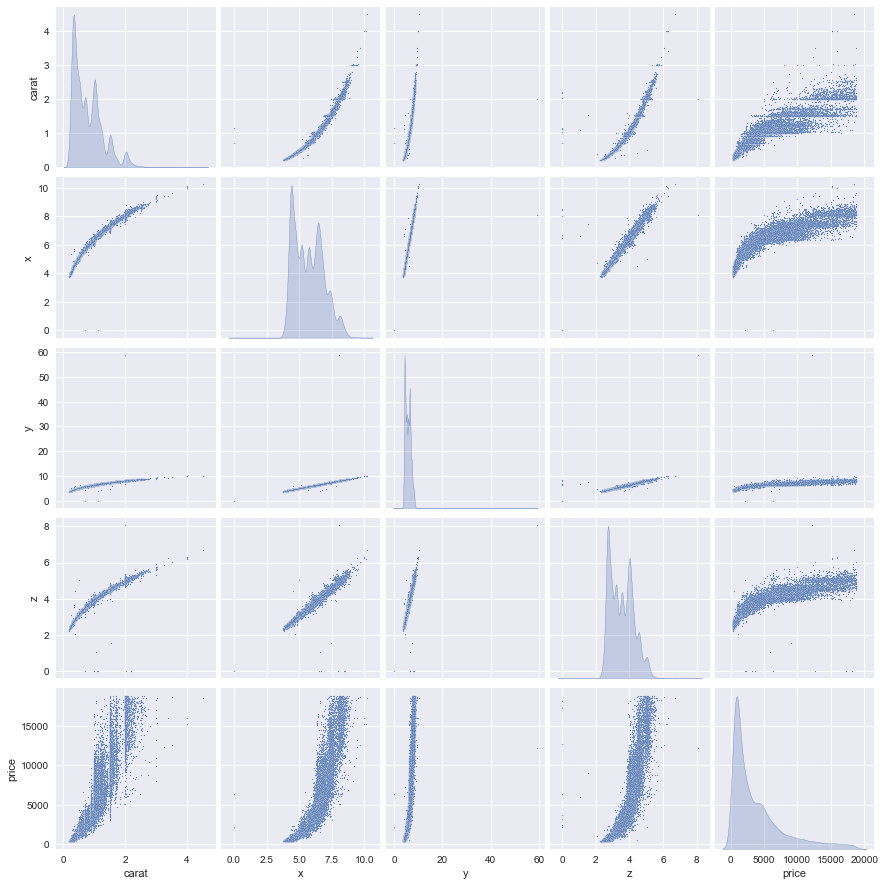

In [42]:
cols = ['carat', 'x', 'y', 'z', 'price']
gemstone_data_2 = gemstone_data.loc[:,cols]
sns.pairplot(data =gemstone_data_2, diag_kind = 'kde', plot_kws = {"s": 1.5})